<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/predict_my_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [16]:
import pandas as pd
file_id = '1rm-AAkYYVHcpUu4yLP-D1d2D7FETgD-P'
url = 'https://drive.google.com/uc?id={}'.format(file_id)

In [17]:
data = pd.read_csv(url)

# Data Processing

In [18]:
data.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes


In [20]:
data.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


In [21]:
data.isnull().sum()

,0
experience,5
test_score,1
interview_score,1
Salary,0


In [22]:
data['experience'].value_counts()

,count
experience,
three,2
five,2
six,2
ten,2
one,2
fifteen,1
thirteen,1
four,1
eleven,1


In [23]:
ordinal_values = {'one':1, 'two':2, 'three':3, 'four':4,
                  'five':5, 'six':6, 'seven':7, 'eight':8,
                  'nine':9, 'ten':10, 'eleven':11, 'twelve':12,
                  'thirteen':13, 'fifteen':15}
data['experience'] = data['experience'].map(ordinal_values)

In [24]:
data['experience']

,experience
0,NaN
1,NaN
2,3.0
3,5.0
4,6.0
5,NaN
6,10.0
7,1.0
8,15.0
9,13.0


In [25]:
mean_experience = data['experience'].mean()
data['experience'] = data['experience'].fillna(mean_experience)

In [26]:
data['experience']

,experience
0,7.0
1,7.0
2,3.0
3,5.0
4,6.0
5,7.0
6,10.0
7,1.0
8,15.0
9,13.0


In [27]:
#fill missing 'test_score' with mean
mean_test_score = data['test_score'].mean()
data['test_score'] = data['test_score'].fillna(mean_test_score)

In [28]:
#fill missing 'interview_score'
mean_interview_score = data['interview_score'].mean()
data['interview_score'] = data['interview_score'].fillna(mean_interview_score)

In [29]:
data.head()

,experience,test_score,interview_score,Salary
0,7.0,8.0,8.0,50000
1,7.0,5.0,4.0,22000
2,3.0,6.0,5.0,30000
3,5.0,9.0,9.0,55000
4,6.0,3.0,5.0,13000


In [30]:
data.isnull().sum()

,0
experience,0
test_score,0
interview_score,0
Salary,0


Create Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

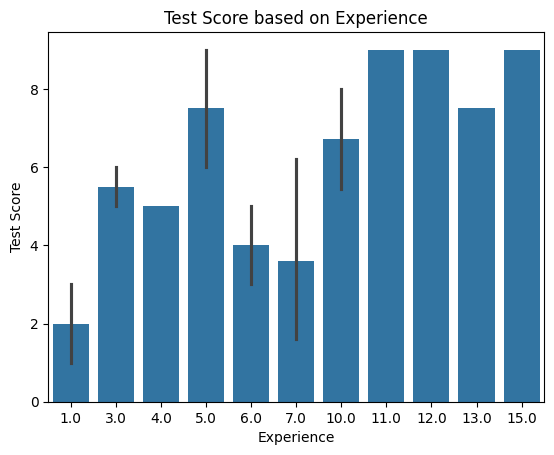

In [32]:
#create bar plot for test score based on experience
sns.barplot(x='experience', y='test_score', data=data)
plt.title('Test Score based on Experience')
plt.xlabel('Experience')
plt.ylabel('Test Score')
plt.show()

<Figure size 1000x1000 with 0 Axes>

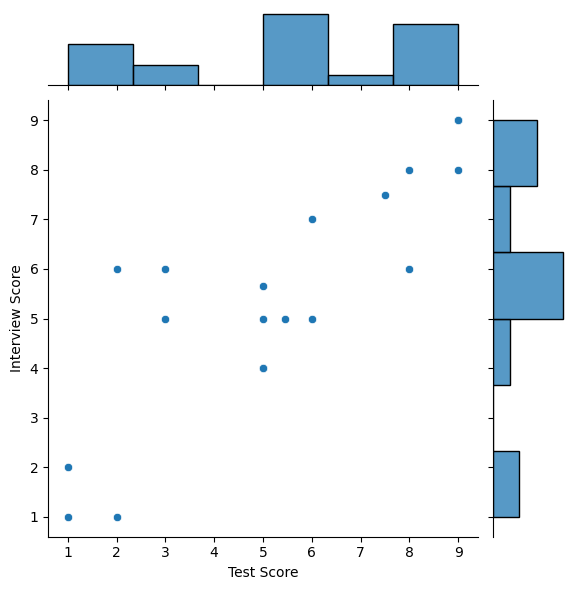

In [37]:
#creat a joint plot for test score vs interview score
plt.figure(figsize=(10,10))
sns.jointplot(x='test_score', y='interview_score', data=data, kind='scatter')

plt.xlabel('Test Score')
plt.ylabel('Interview Score')
plt.show()

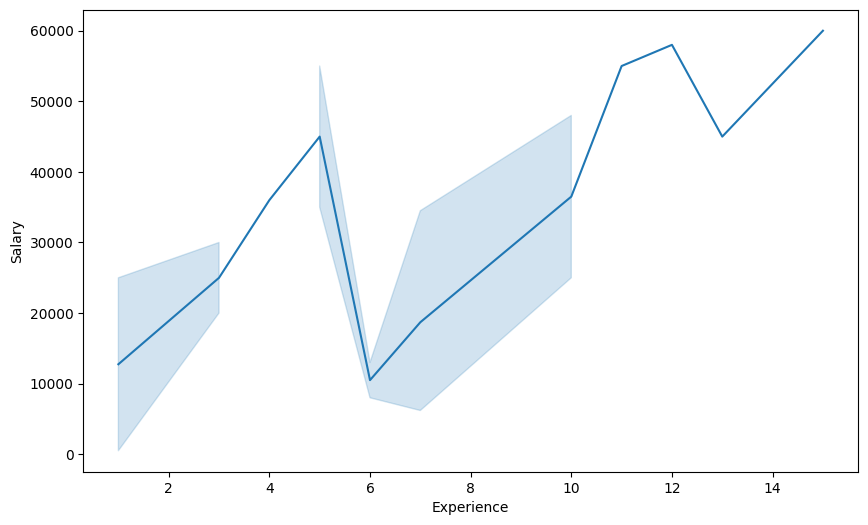

In [39]:
#create line plot for experience vs salary
plt.figure(figsize=(10,6))
sns.lineplot(x='experience', y='Salary', data=data)

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

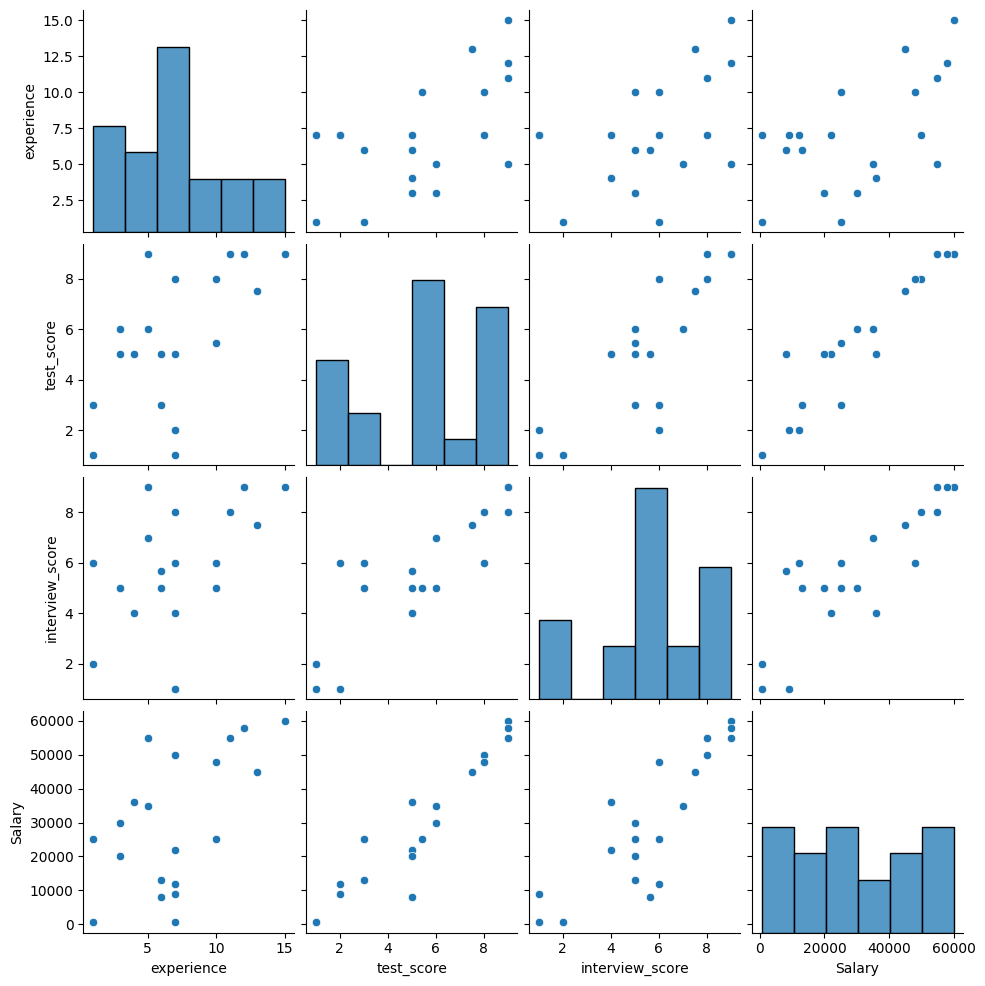

In [40]:
#pair pair plot
sns.pairplot(data)
plt.show()

# Define feature and target

In [41]:
# Features are the input variables that help us predict the target
# In this case, 'Experience', 'Test Score', and 'Interview Score' are the features
features = data.drop(columns=['Salary'], axis=1)

In [42]:
#target is what trying to predict
#in this case, 'Salary' is target

target = data['Salary']

# Data Splitting

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training

In [46]:
from sklearn.linear_model import LinearRegression

In [49]:
#create a linear reg model
linier_model = LinearRegression()

In [50]:
#train the model using the training data
linier_model.fit(features_train, target_train)

LinearRegression()

# Model Evaluation

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
linear_prediction = linier_model.predict(features_test)


In [54]:
#calculate mea for linar req model
linear_mea = mean_squared_error(target_test, linear_prediction)
#calculte r2 score for linear req model
r2 = r2_score(target_test, linear_prediction)
#calculate